Комп считал примерно 8 мин 30 с!


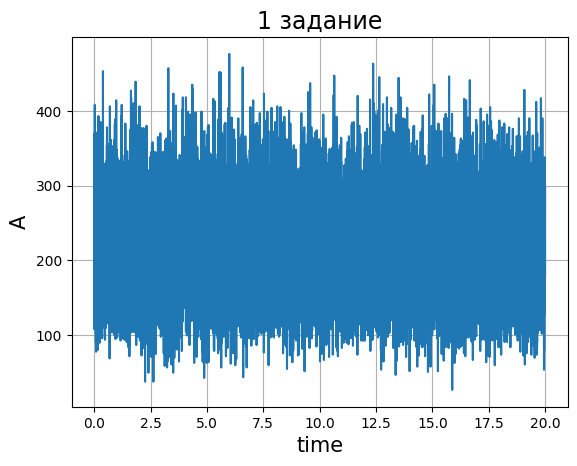

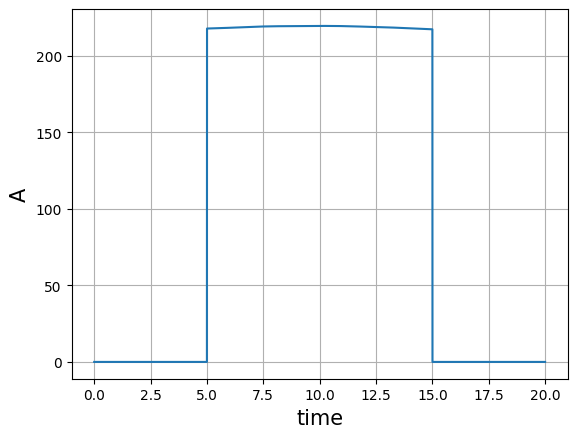

In [1]:
# задание 1
# https://ru.wikipedia.org/wiki/Среднее_арифметическое_взвешенное

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl


# запишем данные из bin файла в массив 
nums = np.fromfile("var03_z1.bin",  dtype=np.int16, count = 20000)

# частота дискретизации
v = 1000
# длительность 10с
N = 10
# значения для усредненного сигнала
ampl = np.zeros(len(nums), float)

#оконная функция
def f(n):
    return 0.62 - 0.48*abs(n/(N*v - 1) - 0.5) - 0.38*np.cos((2*np.pi*n)/(N*v - 1))

#расчет весового среднего
def average(arr, n, frq, ampl):
    l = len(arr)
    summ = 0
    # знаменатель дроби
    for q in range(n*frq + 1):
        summ += f(q)
    # числитель + совмещение    
    for i in range(n*frq, l):
        k = 0
        for j in range(i - n*frq, i + 1):
            k += arr[j]*f(n*frq - (i - j))
        h = int((2*i - n*frq)/2)
        ampl[h] = k/(summ)
        
    return ampl

ampl = average(nums, N, v, ampl)

x = np.arange(0, len(nums)/v, 1/v)

# построение графика функции
pl.figure(1) 
plt.plot(x, nums,  label = 'Исходные данные') # построение графика
plt.title('1 задание', fontsize = 17) # название графика
plt.xlabel('time', fontsize = 15, color = 'black') # подписываем горизонтальную ось
plt.ylabel('A', fontsize = 15, color = 'black') # подписываем вертикальную ось
plt.grid() # сетка на графике

# построение графика функции
pl.figure(2) 
plt.plot(x, ampl,  label = 'Усреднение') # построение графика
plt.xlabel('time', fontsize = 15, color = 'black') # подписываем горизонтальную ось
plt.ylabel('A', fontsize = 15, color = 'black') # подписываем вертикальную ось
plt.grid() # сетка на графике

print('Комп считал примерно 8 мин 30 с!')


In [2]:
# задание 2

# https://ru.dsplib.org/content/fft_dec_in_time/fft_dec_in_time.html
# https://ru.wikipedia.org/wiki/Дискретное_преобразование_Фурье#Формулы_преобразований
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

# запишем данные из bin файла в массив 
nums = np.fromfile("var05_z2.bin",  dtype=np.double)

# массив с амплитудами для спектра
sptr = []

# массивы из нечетных и четных элементов nums соответственно
odd = []
even = []

# массив с частотами в сигнале 
chast = []

# частота дискретизации
v = 1000

# длина спектра
N = len(nums)

# разбиение nums на четные и нечетные члены
for i in range (len(nums)):
    if (np.mod(i,2) == 0):
        even.append(nums[i])
    else:
        odd.append(nums[i])

#оконная функция
def f(n):
    return 0.62 - 0.48*abs(n/(N*v - 1) - 0.5) - 0.38*np.cos((2*np.pi*n)/(N*v - 1))

# поворотный коэффициент ДПФ
def w(k, n):
    return np.exp(complex(0, (-2*np.pi*k)/n))

# суммирование (функция для вычисления s0 и s1)
def s(arr, k):
    c = 0
    for m in range(int(N/2)):
       c += arr[m]*f(m)*w(k*m, N/2) 
    return c

# первая половина
for k in range(int(N/2)):
    s0 = s(even, k)
    s1 = s(odd, k)
    sptr.append(abs(s0 + w(k, N)*s1)/N)
    if ((abs(s0 + w(k, N)*s1)/N) > 1/100000):
        chast.append(len(sptr) - 1)
        
# вторая половина
for k in range(int(N/2)):
    s0 = s(even, k)
    s1 = s(odd, k)
    sptr.append(abs(s0 - w(k, N)*s1)/N)
    if ((abs(s0 - w(k, N)*s1)/N) > 1/100000):
        chast.append(len(sptr) - 1)


x = np.arange(0, len(nums)/v, 1/v)

frq = np.arange(0, len(nums), 1)

# построение графика функции
pl.figure(1) 
plt.plot(x, nums) # построение графика
plt.title('2 задание', fontsize = 17) # название графика
plt.xlabel('time', fontsize = 15, color = 'black') # подписываем горизонтальную ось
plt.ylabel('A', fontsize = 15, color = 'black') # подписываем вертикальную ось
plt.grid() # сетка на графике

# построение графика функции
pl.figure(2) 
plt.plot(frq, sptr) # построение графика (частота равна k/T, где T = 1c, k изменяется от 0 до N-1)
plt.yscale('log')
plt.xlabel('frequency', fontsize = 15, color = 'black') # подписываем горизонтальную ось
plt.ylabel('A', fontsize = 15, color = 'black') # подписываем вертикальную ось
plt.grid() # сетка на графике

# печатаем частоты гармоник в сигнале
print(chast)
print('Уровень шума - все что ниже 10^-5 ')

FileNotFoundError: [Errno 2] No such file or directory: 'var05_z2.bin'